In [ ]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models


In [ ]:
import json
kaggle_credentails = json.load(open("kaggle.json"))

FileNotFoundError: [Errno 2] No such file or directory: 'kaggle.json'

In [ ]:
!ls
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

drive  kaggle.json  sample_data
Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
 99% 2.02G/2.04G [00:14<00:00, 123MB/s]
100% 2.04G/2.04G [00:14<00:00, 150MB/s]


In [ ]:
import zipfile # Import the zipfile module

with zipfile.ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()


In [10]:
#print criteria's
import os # Import the os module

#print criteria's
print(os.listdir("plantvillage dataset"))


print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])


['segmented', 'color', 'grayscale']
38
['Pepper,_bell___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Orange___Haunglongbing_(Citrus_greening)', 'Tomato___Bacterial_spot', 'Grape___Esca_(Black_Measles)']
38
['Pepper,_bell___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Orange___Haunglongbing_(Citrus_greening)', 'Tomato___Bacterial_spot', 'Grape___Esca_(Black_Measles)']
38
['Pepper,_bell___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Orange___Haunglongbing_(Citrus_greening)', 'Tomato___Bacterial_spot', 'Grape___Esca_(Black_Measles)']


In [ ]:
#no of class
import os
print(len(os.listdir("plantvillage dataset/color/Apple___healthy")))
print(os.listdir("plantvillage dataset/color/Apple___healthy")[:5])

1645
['66b2ddc7-46d8-487c-a93b-43d4332b7a31___RS_HL 5764.JPG', '7a193736-ff69-4887-8cd6-44e4639de68f___RS_HL 5996.JPG', 'b9a7faa2-e43b-4d8d-8df0-2256c8ee3607___RS_HL 7483.JPG', '5857071f-208a-40a0-85f2-6bc9f5a98fea___RS_HL 6026.JPG', '0576bbc4-37b3-413c-8a35-4138c2da69a7___RS_HL 8038.JPG']


In [11]:
base_dir= 'plantvillage dataset/color'

In [12]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os # Import os module

image_path = '/content/plantvillage dataset/color/Potato___Early_blight'
for file in os.listdir(image_path):
    if file.endswith(('.jpg', '.png')):
        img = mpimg.imread(os.path.join(image_path, file))
        print (img.shape)
        plt.imshow(img)
        plt.axis('off')
        plt.show()



In [13]:
img_size = 224
batch_size = 32

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [15]:
train_generator = data_gen.flow_from_directory(
    '/content/plantvillage dataset/color',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [16]:
validation_generator = data_gen.flow_from_directory(
    '/content/plantvillage dataset/color',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      47,776,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

 Compile the Model

In [19]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

train model

In [20]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=5,
    validation_data=validation_generator, #Fixed typo here
    validation_steps=validation_generator.samples //batch_size #validating if epochs are overfitting
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 126s 87ms/step - accuracy: 0.5882 - loss: 1.6650 - val_accuracy: 0.8546 - val_loss: 0.4528
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 1s 859us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 105s 77ms/step - accuracy: 0.9131 - loss: 0.2761 - val_accuracy: 0.8728 - val_loss: 0.4086
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 5.0068e-06
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 127s 69ms/step - accuracy: 0.9642 - loss: 0.1149 - val_accuracy: 0.8876 - val_loss: 0.4113


In [21]:
print("Evaluating model...")# making a confusion matrix for accuarcay and evaluation
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples //batch_size) # Use validation_generator, fixed the typo here
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")#loss is diff btw preicted and observed value # Use f-strings for formatting and print() instead of printf()
print(f"Validation Loss: {val_loss}") # Use f-strings for formatting and print() instead of printf()

Evaluating model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 23s 68ms/step - accuracy: 0.8895 - loss: 0.4064
Validation Accuracy: 88.76%
Validation Loss: 0.4113345444202423


accuracy curve

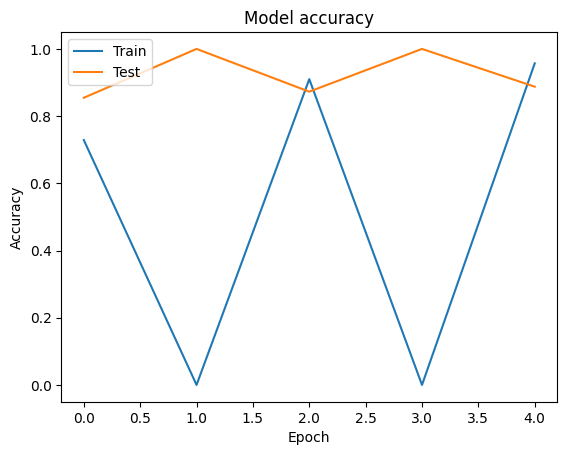

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

loss curve

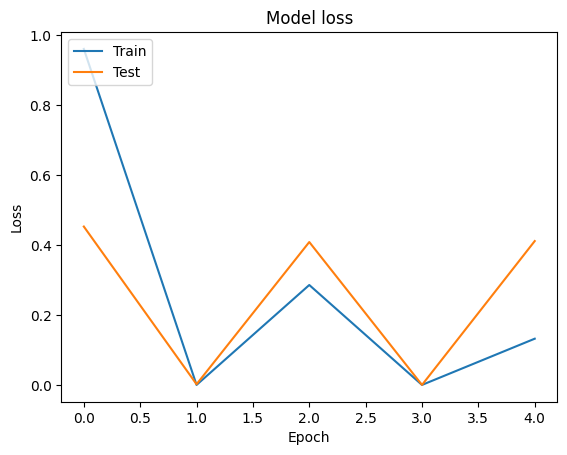

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



predictive system


In [24]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):

    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [25]:
class_indices = {v: k for k, v in train_generator.class_indices.items()}




In [26]:
class_indices


{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

save class name as json file

In [27]:
import json

class_indices = {v: k for k, v in train_generator.class_indices.items()}

json.dump(class_indices, open('class_indices.json', 'w'))

check predictive system

In [30]:
from PIL import Image
import numpy as np

image_path = '/content/test_potato_early_blight (1).jpg'

predicted_class_name = predict_image_class(model, image_path, class_indices)

print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
Predicted Class Name: Potato___Early_blight


save model

In [ ]:
model.save

In [ ]:
from google.colab import drive
drive.mount('/content/drive', timeout_ms=300000)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
